# Graded Assignment 3: 9 to 5

Time to show off your SQL skills! For each question, copy the SQL query you used and make note of the answer.

## The Dataset

For this assignment, you will be using the Bureau of Labor Statistics (BLS) Current Employment Survey (CES) results which can be found on [Kaggle](https://www.kaggle.com/datasets/bls/employment).

## Business Issue

You are working for the Bureau of Labor Statistics with the United States government and have been approached by your boss with an important meeting request. You have been asked by your supervisor to meet with Dolly Parton whose nonprofit is looking to shed light on the state of employment in the United States. As part of the 9 to 5 project, their research is focused on production and nonsupervisory employees and how those employees fare compared to all employees in the United States. While the data the BLS collects from the CES is publicly available, Dolly Parton and her colleagues need your assistance navigating the thousands of rows in each table in LaborStatisticsDB.

## About the Dataset

This dataset comes directly from the Bureau of Labor Statistics’ Current Employment Survey (CES). Here are some things you need to know:

1. The industry table contains an NAICS code. This is different from the industry code. NAICS stands for North American Industry Classification System.
1. Series ID is composed of multiple different codes. CES stands for Current Employment Survey, the name of the survey which collected the data. The industry code as specified by the BLS and the data type code as specified in the datatype table.

## Set Up

To connect to the database, use the same connection info used during the SQL lessons. 

For the assignment, we will be using `LaborStatisticsDB`.

## Database Exploration

To start with, let’s get to know the database further.

1. Use this space to make note of each table in the database, the columns within each table, each column’s data type, and how the tables are connected. You can write this down or draw a diagram. Whatever method helps you get an understanding of what is going on with `LaborStatisticsDB`.
   
   To add a photo, diagram or document to your file, drop the file into the folder that holds this notebook.  Use the link button to the right of the  </> symbol in the gray part of this cell, the link is just the name of your file.

![9to5 assignment.png](<attachment:9to5 assignment.png>)
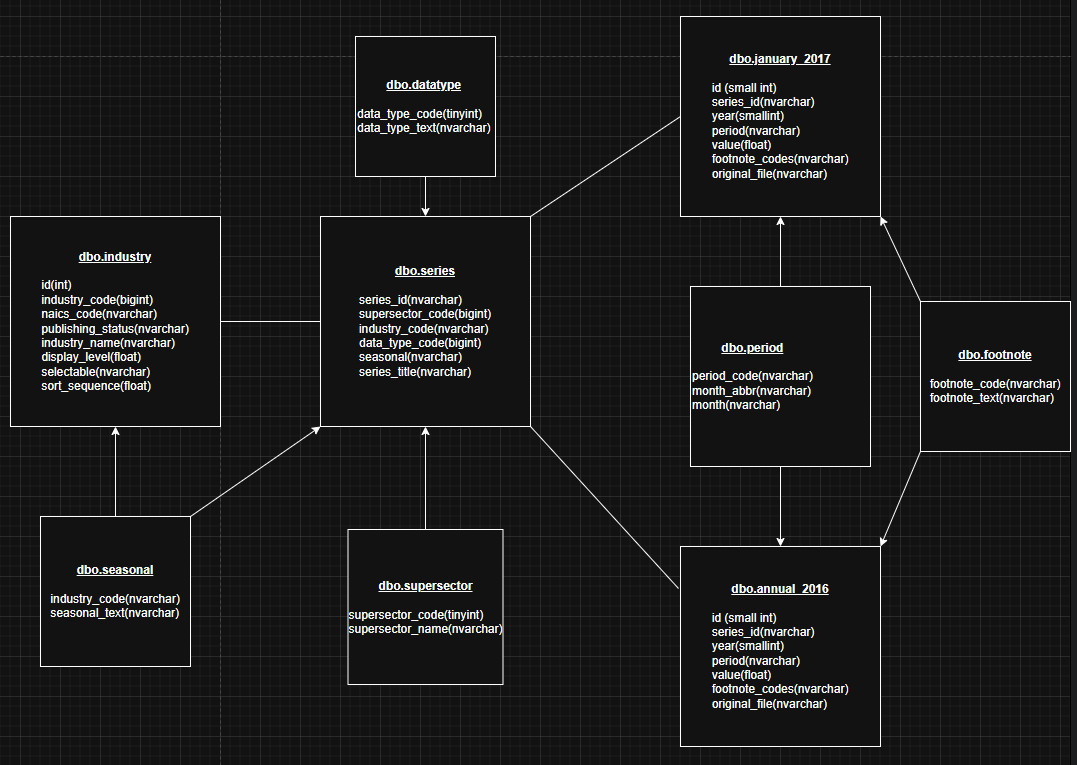

2. What is the datatype for women employees?

In [ ]:
SELECT * FROM dbo.datatype WHERE data_type_text='Women employees'
--10,tinyint

3. What is the series id for  women employees in the commercial banking industry in the financial activities supersector?

In [ ]:

SELECT industry_code FROM dbo.industry where industry_name like '%commercial banking%'
--563	55522110	52211	A	Commercial banking	6	T	564
SELECT supersector_code from  dbo.supersector where supersector_name like '%financial activities%'
--55
SELECT * FROM dbo.series where supersector_code=55 AND industry_code = 55522110 AND series_title like '%women employees%'
--CES5552211010,CEU5552211010
--------------------------------------------------
select series.series_title,series.series_id,industry.industry_name,supersector.supersector_name
from dbo.industry as industry 
inner join dbo.series as series
on industry.industry_code=series.industry_code
INNER JOIN dbo.supersector as supersector
on series.supersector_code = supersector.supersector_code
where series_title='Women employees' 
and industry_name like '%commercial banking%'
and supersector_name like '%financial activities%'

## Aggregate Your Friends and Code some SQL

Put together the following:

1. How many employees were reported in 2016 in all industries? Round to the nearest whole number.

In [ ]:
select * from dbo.series where data_type_code=1 --All Employees
select ROUND(SUM(value),0) as total_employee_count from dbo.annual_2016 
WHERE series_id IN(
    select a.series_id 
    from dbo.series as a 
    WHERE a.data_type_code=1)
    --2340612

2. How many women employees were reported in 2016 in all industries? Round to the nearest whole number. 

In [ ]:
select ROUND(SUM(value),0) as Women_employee_count from dbo.annual_2016 
WHERE series_id IN(
    select a.series_id 
    from dbo.series as a 
    WHERE a.data_type_code=10)
---1125490

3. How many production/nonsupervisory employees were reported in 2016? Round to the nearest whole number. 

In [ ]:
SELECT * from dbo.datatype where data_type_text ='PRODUCTION AND NONSUPERVISORY EMPLOYEES' --6

SELECT Round(SUM(value),0) as production_employee_count from dbo.annual_2016 
WHERE series_id IN(
    select a.series_id 
    from dbo.series as a 
    WHERE a.data_type_code=6)
--1263650

4. In January 2017, what is the average weekly hours worked by production and nonsupervisory employees across all industries?

In [ ]:
SELECT * from dbo.datatype where data_type_text ='AVERAGE WEEKLY HOURS OF PRODUCTION AND NONSUPERVISORY EMPLOYEES'--7
select ROUND(AVG(value),0) as avg_weekly_hours from dbo.january_2017
WHERE series_id IN(
    select a.series_id 
    from dbo.series as a 
    WHERE a.data_type_code=7)

--36

5. What is the total weekly payroll for production and nonsupervisory employees across all industries in January 2017? Round to the nearest penny.

In [ ]:
SELECT * FROM dbo.datatype WHERE data_type_text ='AGGREGATE WEEKLY PAYROLLS OF PRODUCTION AND NONSUPERVISORY EMPLOYEES' --82

SELECT SUM(j.value) as Total_weekly_payroll_prod_Nonsup_employees
FROM dbo.january_2017 AS j
WHERE series_id IN(
    SELECT s.series_id 
    FROM dbo.series AS s
    WHERE s.data_type_code=82)
--1838753220

6. In January 2017, for which industry was the average weekly hours worked by production and nonsupervisory employees the highest? Which industry was the lowest?

In [ ]:
select * FROM dbo.datatype where data_type_text='Average weekly hours of production and nonsupervisory employees' --data type code 7
SELECT DISTINCT *
FROM (
    SELECT
jan.[value],
(   SELECT  industry_name
    FROM industry as I
    WHERE i.industry_code=(
    SELECT ser.industry_code
    FROM dbo.series as ser
    WHERE ser.series_id=jan.series_id
    )
) AS industry_name
FROM dbo.january_2017 as jan
WHERE jan.series_id IN (
    SELECT ser.series_id
    from dbo.series as ser
    where ser.data_type_code =7)
) AS result
    WHERE result.industry_name IS NOT NULL
    ORDER BY result.[value] DESC  
--49.8,Motor vehicle power train components
--16.7,Fitness and recreational sports centers

7. In January 2021, for which industry was the total weekly payroll for production and nonsupervisory employees the highest? Which industry was the lowest?

In [ ]:
SELECT DISTINCT  *
FROM (
    SELECT
  jan.[value],
(   SELECT  industry_name
    FROM industry as I
    WHERE i.industry_code=(
    SELECT ser.industry_code
    FROM dbo.series as ser
    WHERE ser.series_id=jan.series_id
    )
) AS industry_name
FROM dbo.january_2017 as jan
WHERE jan.series_id IN (
    SELECT ser.series_id
    from dbo.series as ser
    where ser.data_type_code =82)
) AS result
    WHERE result.industry_name IS NOT NULL
    ORDER BY result.[value] DESC
    --Total Private has the highest,74498171
    --Coin-operated laundries and drycleaners,10079

## Join in on the Fun

Time to start joining! You can choose the type of join you use, just make sure to make a  note!

1. Join `annual_2016` with `series` on `series_id`. We only want the data in the `annual_2016` table to be included in the result.

In [ ]:
-- Limiting rows returned from query, uncomment the line below to start on your query!
-- SELECT TOP 50 *
USE LaborStatisticsDB
select TOP 50 A16.* from dbo.annual_2016 AS A16
INNER JOIN dbo.series AS series
ON A16.series_id=series.series_id

-- Uncomment the line below when you are ready to run the query, leaving it as your last!
-- ORDER BY id
USE LaborStatisticsDB
select TOP 50 A16.* from dbo.annual_2016 AS A16
INNER JOIN dbo.series AS series
ON A16.series_id=series.series_id
ORDER BY A16.series_id

Commands completed successfully.

Total execution time: 00:00:00.019

2. Join `series` and `datatype` on `data_type_code`.

In [ ]:
-- Limiting rows returned from query, uncomment the line below to start on your query!
-- SELECT TOP 50 *
select TOP 50 A16.* from dbo.annual_2016 AS A16
INNER JOIN dbo.series AS series
ON A16.series_id=series.series_id
INNER JOIN dbo.datatype AS dt
ON series.data_type_code = dt.data_type_code
--------------------------------------------------
select TOP 50 * from dbo.series AS series
INNER JOIN dbo.datatype AS dt
ON series.data_type_code = dt.data_type_code

-- Uncomment the line below when you are ready to run the query, leaving it as your last!
-- ORDER BY id
select TOP 50 A16.* from dbo.annual_2016 AS A16
INNER JOIN dbo.series AS series
ON A16.series_id=series.series_id
INNER JOIN dbo.datatype AS dt
ON series.data_type_code = dt.data_type_code
ORDER BY A16.id

3. Join `series` and `industry` on `industry_code`.

In [ ]:
-- Limiting rows returned from query, uncomment the line below to start on your query!
-- SELECT TOP 50 *
SELECT TOP 50 * FROM dbo.series as s
INNER JOIN dbo.industry as i
on s.industry_code=i.industry_code
----------------------------------
SELECT TOP 50 A16.* from dbo.annual_2016 AS A16
INNER JOIN dbo.series AS series
ON A16.series_id=series.series_id
INNER JOIN dbo.datatype AS dt
ON series.data_type_code = dt.data_type_code
INNER JOIN dbo.industry as i
ON series.industry_code=i.industry_code

-- Uncomment the line below when you are ready to run the query, leaving it as your last!
-- ORDER BY id
SELECT TOP 50 * FROM dbo.series as s
INNER JOIN dbo.industry as i
on s.industry_code=i.industry_code
ORDER BY i.id
----------------------------------------
SELECT TOP 50 A16.* from dbo.annual_2016 AS A16
INNER JOIN dbo.series AS series
ON A16.series_id=series.series_id
INNER JOIN dbo.datatype AS dt
ON series.data_type_code = dt.data_type_code
INNER JOIN dbo.industry as i
on series.industry_code=i.industry_code
ORDER BY A16.id

## Subqueries, Unions, Derived Tables, Oh My!

1. Write a query that returns the `series_id`, `industry_code`, `industry_name`, and `value` from the `january_2017` table but only if that value is greater than the average value for `annual_2016` of `data_type_code` 82.

In [ ]:
SELECT jan.series_id, series.industry_code, industry.industry_name,jan.[value]
FROM dbo.january_2017 as Jan
INNER JOIN dbo.series as series
on jan.series_id = series.series_id
INNER JOIN dbo.industry as industry
ON series.industry_code = industry.industry_code 
WHERE  jan.[value]> (
    SELECT AVG(ann.value) 
    FROM dbo.annual_2016 AS ann
    INNER JOIN dbo.series as s2
    ON ann.series_id=s2.series_id
    WHERE data_type_code=82
    )

**Optional Bonus Question:** Write the above query as a common table expression!

In [ ]:
-- Optional CTE below
WITH cte_value AS(
    SELECT AVG(ann.value) as avg_value
    FROM dbo.annual_2016 AS ann
    INNER JOIN dbo.series as s2
    ON ann.series_id=s2.series_id
    WHERE data_type_code=82
    )
SELECT jan.series_id, series.industry_code, industry.industry_name,jan.[value]
FROM dbo.january_2017 as Jan
INNER JOIN dbo.series as series
on jan.series_id = series.series_id
-- INNER JOIN dbo.annual_2016 AS ann
-- ON ann.series_id=series.series_id
INNER JOIN dbo.industry as industry
ON series.industry_code = industry.industry_code 
where jan.[value]>(select avg_value from cte_value)

2. Create a `Union` table comparing average weekly earnings of production and nonsupervisory employees between `annual_2016` and `january_2017` using the data type 30.  Round to the nearest penny.  You should have a column for the average earnings and a column for the year, and the period.

In [ ]:
SELECT Ann_2016.[year],ROUND(AVG(Ann_2016.[value]),2)AS average_earnings,Ann_2016.[period] 
FROM annual_2016 as Ann_2016
INNER JOIN dbo.series as s2
ON Ann_2016.series_id=s2.series_id
WHERE data_type_code=30
GROUP BY Ann_2016.[year],Ann_2016.[period]
UNION 
SELECT Jan_2017.[year],ROUND(AVG(Jan_2017.[value]),2)AS average_earnings,Jan_2017.[period] 
FROM january_2017 as Jan_2017
INNER JOIN dbo.series as s2
ON Jan_2017.series_id=s2.series_id
WHERE data_type_code=30
GROUP BY Jan_2017.[year],Jan_2017.[period]

## Summarize Your Results

With what you know now about the  Bureau of Labor Statistics (BLS) Current Employment Survey (CES) results and working with the Labor Statistics Database, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. During which time period did production and nonsupervisory employees fare better?

Aggregate payroll or total earnings were better in 2017 with 1839113368 as against 903773481 in 2016

2. In which industries did production and nonsupervisory employees fare better?

In 2017, these are the Top 3 industries that the production and non supervisory employees fared better
INDUSTRY                                AVG WEEKLY EARNINGS
Reinsurance carriers	                1181
Petroleum and coal products	            1176
Fossil fuel electric power generation	1160
In 2016 :
Pipeline transportation	                1136
Software publishers	                    1129
Petroleum and coal products	            1128

3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?
